## Adaptive Moment estimation
- 경사하강에서 빠르게 할 것, 느리게 할 것을 결정
- wight 하나하나를 고려해서 alpha를 결정
  - wight가 같은 방향으로 감소할 때, 학습률 높이기
  - wight가 진동을 하면, 학습률 낮추기

- compile -> `tf.keras.optimizers.Adam()`
  - loss를 정의할 때 `tf.keras.optimizers.SparseCategroicalCrossentropy(from_logits=True)`
    - from_logits=True : 모델의 아웃풋이 logit(변형되지 않은 날 것)이었을 때.
    - from_logits=False : 모델의 아웃풋이 변형된 값 (e^z_k)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

tfk = tf.keras
tfkl = tfk.layers

In [2]:
z = np.array([1., 2., 3., 4.])

In [18]:
tf.nn.softmax(z)

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])>

In [5]:
tf.reduce_sum(tf.nn.softmax(z))

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [16]:
def softmax(z):
  tmp = np.asarray([np.exp(zk) for zk in z])
  a = np.asarray([t/sum(tmp) for t in tmp])
  return a

In [17]:
softmax(z)

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [19]:
def softmax_(z):
  return np.exp(z)/np.exp(z).sum()

In [20]:
softmax_(z)

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [21]:
mnist = tfk.datasets.mnist.load_data(path='mnist.npz')

11490434/11490434 [==============================] - 2s 0us/step


In [22]:
(x_train, y_train), (x_test, y_test) = mnist

In [25]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [26]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

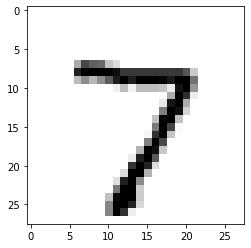

In [29]:
plt.imshow(x_test[0], cmap='gray_r')

In [41]:
# 25, 15, 10
model = tfk.Sequential([
    tfk.Input(shape=(28*28,)),
    tfkl.Dense(25, activation='relu'), # tfk.activations.relu
    tfkl.Dense(15, activation='relu'),
    tfkl.Dense(10, activation='linear'),
])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                19625     
                                                                 
 dense_7 (Dense)             (None, 15)                390       
                                                                 
 dense_8 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [43]:
x = tfk.Input(shape=(28*28,))

In [44]:
x.shape

TensorShape([None, 784])

In [45]:
model(x)

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'sequential_2')>

In [48]:
w1, b1 = model.layers[0].get_weights()

In [49]:
w1.shape, b1.shape

((784, 25), (25,))

In [71]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam',
              metrics=['accuracy'])

In [72]:
history = model.fit(
    x_train.reshape(60000, -1),
    y_train,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 11.7730 - accuracy: 0.1789
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 11.6664 - accuracy: 0.2239
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 11.5723 - accuracy: 0.2385
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 11.5597 - accuracy: 0.2183
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 11.6824 - accuracy: 0.1924


In [73]:
history.history

{'loss': [11.773028373718262,
  11.666437149047852,
  11.572341918945312,
  11.559686660766602,
  11.68237018585205],
 'accuracy': [0.1789499968290329,
  0.22388333082199097,
  0.23849999904632568,
  0.21831665933132172,
  0.19238333404064178]}

In [74]:
model.evaluate(x_test.reshape(10000, -1), y_test)

313/313 [==============================] - 1s 2ms/step - loss: 11.4435 - accuracy: 0.2674


[11.44350814819336, 0.26739999651908875]

---

## CNN 의 원리

- Dense Layer
  - 모든 Input을 다 확인함 -> 빡빡한 레이어
- Convolutional Layer
  - Input에 특정 영역(일부)을 보고 계산 
    - 빠른 연산
    - 적은 데이터로도 연산
  - filter -> 특정 영역만 확인해 훑음
  - 1D에서도 쓸 수 있음 
    - 예시 ) EKG (심박 측정) -> 심장병 여부 확인
    - 예시 ) 음성 데이터 -> 데이터의 양이 많아서 CNN 사용 (일부씩만 확인)
  